<h1 style='color:Green'>Weighted Log Rank test.  </h1>


**Weighted log rank tests** are extensions of the standard log rank test used in survival analysis. 

**Unequal importance**:It is not the case that all events or occurences are equally important. Thus by assigning weights we can assign more or less importance to some event.

**Imbalance in Group Sizes**: 
When comparing survival between different groups (e.g., treatment vs. control), there may be imbalances in group sizes or event rates. Weighted log rank tests can account for these imbalances by adjusting the contribution of events based on group characteristics.

**example**:for comparing survival rates between different hospitals, there might be significant variations in patient volumes across hospitals. This can be accounted for by assigning weights in proportion to the volume of patients arriving at each hospital

**Variable Event Times**: In survival studies, events may occur at different time points, and the impact of events may vary over time. Weighted log rank tests can consider the timing of events and adjust weights accordingly, capturing the changing risk profiles. 

**For instance** in certain diseases certain symptoms may become more frequent at some stage

**Improved Sensitivity**: By incorporating weights, weighted log rank tests can account for the different extent to which certain test groups are susceptible to certain event. 

**For example** air pollutionm levels may have different levels of severity for different age groups of people.

In essence, weighted log rank tests offer a more flexible and nuanced approach to survival analysis, allowing researchers to account for varying importance of events, group characteristics, and event timing, leading to more accurate and meaningful interpretations of survival data.

**Few examples of weighted log rank tests include:**

**1. Wil-coxon**

**2. Peto**

**3. Tarone-Ware**



In [3]:
import numpy as np
import pandas as pd
import math
import itertools
import statistics
from scipy.stats import expon, norm, mannwhitneyu
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [10]:
data_observed = {
    'Time_Label': [4,6,11,15,20,25],
    'Male Population at Risk':[5,4,2,2,0,0],
    'Female Population at Risk':[5,5,5,4,4,2],
    'Total Population at Risk':[10,9,7,6,4,2],
    'Observed_Male_Deaths': [1,1,0,2,0,0],
    'Observed_Female_Deaths': [0,0,1,0,1,1],
    'Observed_Total_Deaths': [1,1,1,2,1,1],
    'Expected Male Deaths':[0.5,0.444,0.286,0.667,0,0],
    'Expected Female Deaths':[0.5,0.556,0.714,1.333,1,1]
}
df=pd.DataFrame(data_observed)


df['Vj'] = (df['Male Population at Risk']*df['Female Population at Risk'] *(df['Observed_Male_Deaths']+df['Observed_Female_Deaths']))/(df['Total Population at Risk']*df['Total Population at Risk']*(df['Total Population at Risk']-1))


numerator = 0
denominator = 0

# The weighted log-rank formula
for i in range(len(df)):
    numerator += df.loc[i, 'Total Population at Risk'] * ((df.loc[i, 'Observed_Male_Deaths'] - df.loc[i, 'Expected Male Deaths']) ** 2)
    numerator += df.loc[i, 'Total Population at Risk'] * ((df.loc[i, 'Observed_Female_Deaths'] - df.loc[i, 'Expected Female Deaths']) ** 2)
    denominator += df.loc[i, 'Total Population at Risk'] ** 2 * (df.loc[i, 'Vj'])

weighted_logrank_statistic = numerator / denominator
print("Weighted log-rank statistic:", weighted_logrank_statistic)

# The log-rank formula
res=0

res=res+math.pow((df['Observed_Male_Deaths'].sum())-(df['Expected Male Deaths'].sum()),2)/(df['Vj'].sum())
res=res+math.pow((df['Observed_Female_Deaths'].sum())-(df['Expected Female Deaths'].sum()),2)/(df['Vj'].sum())

print(res)

Weighted log-rank statistic: 3.2561921139101866
48.72204599542015


<h1 style='color:Green'>Weighted Log rank test for Synthetic Data</h1>
<h4 style='color:Gray'>Using Exponential, Lognormal and Weibull distributions</h1>

Here we use **3 weighted log rank tests**:

**1. Wil-coxon**

(a) The Wilcoxon weighted log rank test assigns higher weights to earlier events (in **Generalised wil-coxon** population at risk at a time point is used as weight for each group as population at risk is monotonically decreasing), emphasizing the impact of early differences in survival curves.

(b) It would be particularly suitable for situations where early differences in survival distributions are of more importance

**2. Tarone-ware**

(a) Similar to wil-coxon in the sense that earlier events are weighed higher. We assign weights = $$ \sqrt{Population  At Risk} $$
 for this method
 
(b)It is non-ideal for very small samples; 8 to 10 measurements is usually recommended. It doesn’t require normality in the data set, though data that is very far from a norm may possibly produce slightly skewed results.

*(source:statisticshowto.com)*


**3. Peto**

The Pito test uses a weighted average of the observed minus expected score. It places more emphasis on the information at the beginning of the survival curve where the number at risk is large. It uses fraction of survival time for computing weights

In [11]:
def generate_survival_data(size, distribution):
    if distribution == 'exponential':
        return np.random.exponential(scale=1, size=size)
    elif distribution == 'weibull':
        return np.random.weibull(a=1, size=size)
    elif distribution == 'lognormal':
        return np.random.lognormal(mean=0, sigma=1, size=size)
    elif distribution == 'gamma':
        return np.random.gamma(shape=2, scale=1, size=size)
    else:
        raise ValueError("Invalid distribution")

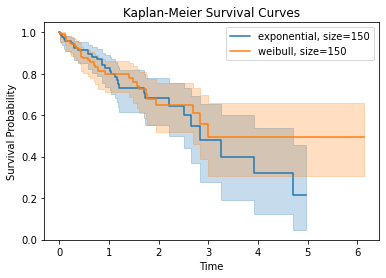

------------------------------------------------------------------------------------------
Size of population used:150 ; Distribution 1 : exponential ; Distribution 2: weibull
------------------------------------------------------------------------------------------
Summary for Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.12 0.73      0.45

Summary for  wilcoxon  Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.02 0.88      0.19

Summary for  tarone-ware  Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           0.00 0.98      0.03

Summary for  peto  Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           0.02 0.89      0.17

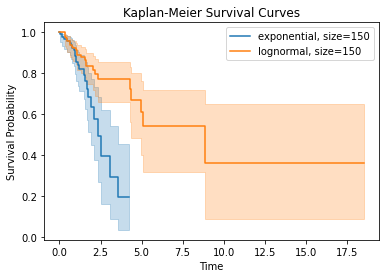

------------------------------------------------------------------------------------------
Size of population used:150 ; Distribution 1 : exponential ; Distribution 2: lognormal
------------------------------------------------------------------------------------------
Summary for Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.72 <0.005      8.31

Summary for  wilcoxon  Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           2.36 0.12      3.00

Summary for  tarone-ware  Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           4.32 0.04      4.73

Summary for  peto  Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           6.76 0.01      6.75

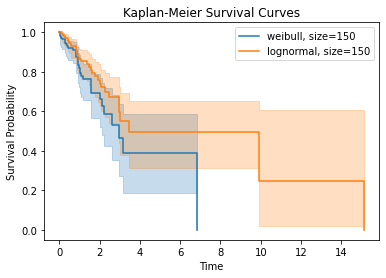

------------------------------------------------------------------------------------------
Size of population used:150 ; Distribution 1 : weibull ; Distribution 2: lognormal
------------------------------------------------------------------------------------------
Summary for Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.91 0.09      3.51

Summary for  wilcoxon  Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           2.22 0.14      2.87

Summary for  tarone-ware  Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           2.44 0.12      3.08

Summary for  peto  Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           2.59 0.11      3.22

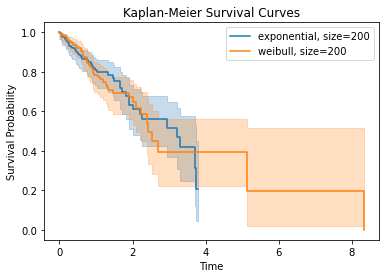

------------------------------------------------------------------------------------------
Size of population used:200 ; Distribution 1 : exponential ; Distribution 2: weibull
------------------------------------------------------------------------------------------
Summary for Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.04

Summary for  wilcoxon  Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.02 0.90      0.15

Summary for  tarone-ware  Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.04

Summary for  peto  Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           0.01 0.93      0.10

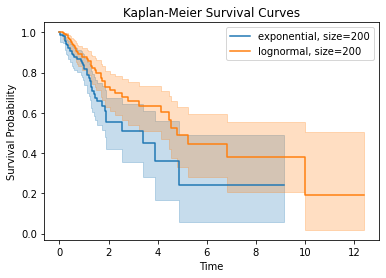

------------------------------------------------------------------------------------------
Size of population used:200 ; Distribution 1 : exponential ; Distribution 2: lognormal
------------------------------------------------------------------------------------------
Summary for Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.79 0.02      5.96

Summary for  wilcoxon  Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           4.89 0.03      5.21

Summary for  tarone-ware  Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           5.44 0.02      5.67

Summary for  peto  Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           5.75 0.02      5.93

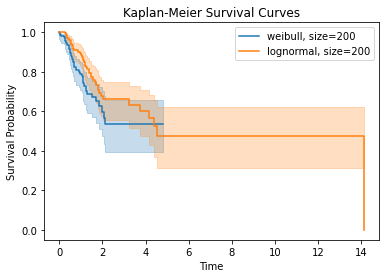

------------------------------------------------------------------------------------------
Size of population used:200 ; Distribution 1 : weibull ; Distribution 2: lognormal
------------------------------------------------------------------------------------------
Summary for Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.68 0.03      5.04

Summary for  wilcoxon  Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           7.21 0.01      7.11

Summary for  tarone-ware  Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           6.32 0.01      6.39

Summary for  peto  Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           5.52 0.02      5.73

In [14]:
dataset_sizes = [150, 200]  
distributions = ['exponential', 'weibull', 'lognormal']  

for size in dataset_sizes:
    for dist1, dist2 in itertools.combinations(distributions, 2):
        data1 = generate_survival_data(size, dist1)
        data2 = generate_survival_data(size, dist2)
        
        # Assuming 20% censoring for both datasets
        censored_data = np.random.choice([True, False], size=size, p=[0.2, 0.8])

        df1 = pd.DataFrame({'Time': data1, 'Censored': censored_data})
        df2 = pd.DataFrame({'Time': data2, 'Censored': censored_data})

        kmf1 = KaplanMeierFitter()
        kmf1.fit(df1['Time'], event_observed=df1['Censored'])

        kmf2 = KaplanMeierFitter()
        kmf2.fit(df2['Time'], event_observed=df2['Censored'])


        kmf1.plot(label=f"{dist1}, size={size}")
        kmf2.plot(label=f"{dist2}, size={size}")
        
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Survival Probability')
        plt.title('Kaplan-Meier Survival Curves')
        plt.show()
        
        print("-"*90)
        print(f"Size of population used:{size} ; Distribution 1 : {dist1} ; Distribution 2: {dist2}")
        print("-"*90)
        w1 = np.ones(df1.shape[0])
        w2 = np.ones(df2.shape[0])
        print("Summary for Log-Rank Test (Simple)")
        result=logrank_test(df1['Time'],df2['Time'],df1['Censored'],df2['Censored'],weights_A=w1,weights_B=w2)
        result.print_summary()
        
        for weightings in ['wilcoxon','tarone-ware','peto']:
            print("Summary for ", weightings, " Test")
            result=logrank_test(df1['Time'],df2['Time'],df1['Censored'],df2['Censored'],weightings=weightings)
            result.print_summary()       

<h1 style="color:Green">Power of Test</h1>

The power analysis of a statistical test assesses its ability to detect a true effect when it exists. In the context of survival analysis, the power of the weighted log-rank test is particularly important as it determines the likelihood of correctly identifying differences in survival distributions between groups.

## Power of the Test

The power of the log-rank test is influenced by several factors, including the sample size, the hazard ratio (effect size), the level of censoring, and the chosen significance level (alpha). It is defined as the probability of rejecting the null hypothesis (no difference in survival distributions) when it is false.

## Formula

The power of the weighted log-rank test can be calculated using the following formula:

$$ \text{Power} = P(\text{Reject } H_0 | H_1 \text{ is true}) $$

Where:
- \( H_0 \): Null hypothesis (no difference in survival distributions)
- \( H_1 \): Alternative hypothesis (difference in survival distributions)
- \( P \): Probability
- "Reject \( H_0 \)": Reject the null hypothesis

Power is closely related to the concept of a type II error, also known as false negative.
$$ \text{Power} = 1 -  \text{ probability of type II error} $$

## Interpretation

A higher power value indicates a greater ability of the test to detect differences in survival distributions when they truly exist. Conversely, a lower power value suggests a higher risk of failing to detect true differences, leading to a Type II error (false negative).

## Implementation

In this section, we will conduct a power analysis of the weighted log-rank test by simulating survival data of the 3 distributions and estimating the power of the test for each scenario.

In [28]:
n_simulations = 1000 
n_samples = 100
hazard_ratio = 1.5 
alpha = 0.05

In [32]:
def calculate_power(n_simulations, n_samples, hazard_ratio, alpha,flag):
    powers = [0,0,0,0]
    p_values = [[],[],[],[]]
    for i in range(n_simulations):
        if(flag==1):
            surv1 = np.random.lognormal(mean=np.log(hazard_ratio),sigma=1, size=n_samples)
            surv2 = np.random.weibull(hazard_ratio, size=n_samples)
        elif(flag==2):
            surv1 = np.random.lognormal(mean=np.log(1.1),sigma=1, size=n_samples)
            surv2 = np.random.exponential(scale=1/hazard_ratio, size=n_samples)
        else:
            surv1 = np.random.exponential(scale=1/hazard_ratio, size=n_samples)
            surv2 = np.random.weibull(hazard_ratio, size=n_samples)
        
        censored_data = np.random.choice([True, False], size=n_samples, p=[0.2, 0.8])

        df1 = pd.DataFrame({'Time': surv1, 'Censored': censored_data})
        df2 = pd.DataFrame({'Time': surv2, 'Censored': censored_data})
        
        # Normal log-rank
        results = logrank_test(df1['Time'], df2['Time'], event_observed_A=df1['Censored'], event_observed_B=df2['Censored'])
        if results.p_value < alpha:
            powers[0] += 1
        p_values[0].append(results.p_value)
    
        # Other tests
        for idx, weightings in enumerate(['wilcoxon','tarone-ware','peto']):
            results = logrank_test(df1['Time'], df2['Time'], event_observed_A=df1['Censored'], event_observed_B=df2['Censored'],weightings=weightings)
            if results.p_value < alpha:
                powers[idx+1] += 1
            p_values[idx+1].append(results.p_value)
    return np.array(powers)/n_simulations, p_values

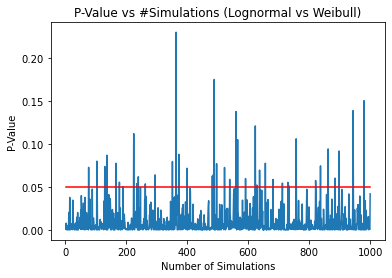

Power of Log-Rank Test : 95.7 %


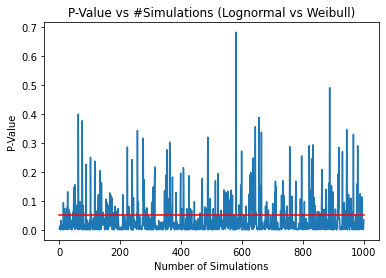

Power of wil-coxon Test : 77.9 %


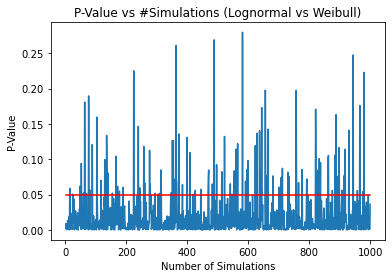

Power of tarone-ware Test : 88.3 %


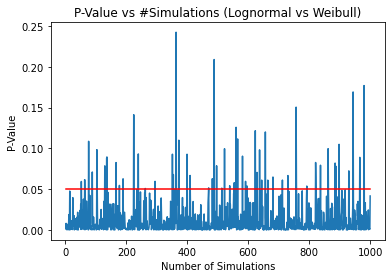

Power of peto Test : 93.8 %


In [34]:
powers,p_values = calculate_power(n_simulations, n_samples, hazard_ratio, alpha,1)

x=np.linspace(1,n_simulations,n_simulations)
y=[0.05 for _ in range(1000)]
plt.plot(x,p_values[0])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs Weibull)')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[0]*100,3)} %")

plt.plot(x,p_values[1])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs Weibull)')
plt.show()
print(f"Power of wil-coxon Test : {round(powers[1]*100,3)} %")

plt.plot(x,p_values[2])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs Weibull)')
plt.show()
print(f"Power of tarone-ware Test : {round(powers[2]*100,3)} %")

plt.plot(x,p_values[3])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs exponential)')
plt.show()
print(f"Power of peto Test : {round(powers[3]*100,3)} %")

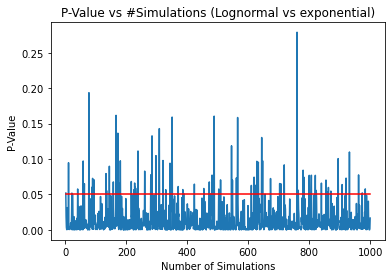

Power of Log-Rank Test : 91.3 %


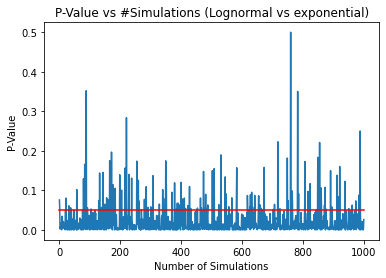

Power of wil-coxon Test : 86.1 %


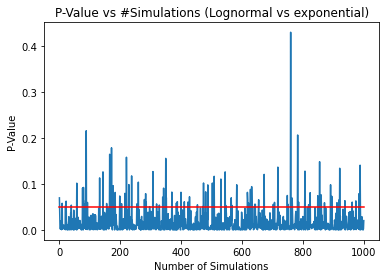

Power of tarone-ware Test : 90.0 %


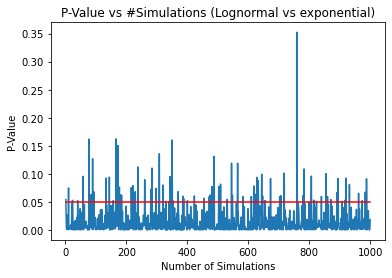

Power of peto Test : 91.2 %


In [35]:
powers,p_values = calculate_power(n_simulations, n_samples, hazard_ratio, alpha,2)

x=np.linspace(1,n_simulations,n_simulations)
y=[0.05 for _ in range(1000)]
plt.plot(x,p_values[0])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs exponential)')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[0]*100,3)} %")

plt.plot(x,p_values[1])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs exponential)')
plt.show()
print(f"Power of wil-coxon Test : {round(powers[1]*100,3)} %")

plt.plot(x,p_values[2])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs exponential)')
plt.show()
print(f"Power of tarone-ware Test : {round(powers[2]*100,3)} %")

plt.plot(x,p_values[3])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (Lognormal vs exponential)')
plt.show()
print(f"Power of peto Test : {round(powers[3]*100,3)} %")

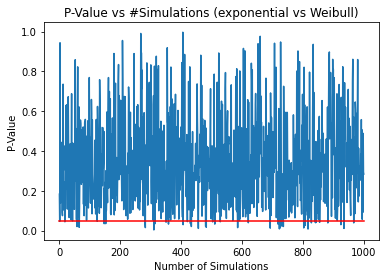

Power of Log-Rank Test : 4.5 %


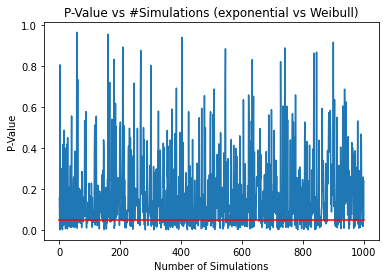

Power of wil-coxon Test : 30.2 %


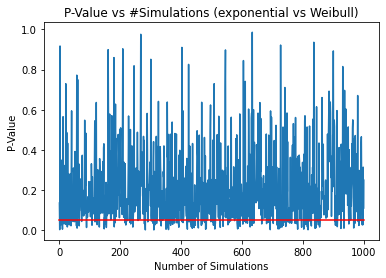

Power of tarone-ware Test : 17.6 %


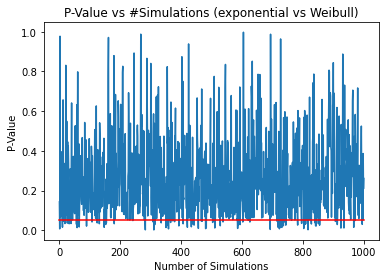

Power of peto Test : 8.9 %


In [33]:
powers,p_values = calculate_power(n_simulations, n_samples, hazard_ratio, alpha,3)

x=np.linspace(1,n_simulations,n_simulations)
y=[0.05 for _ in range(1000)]
plt.plot(x,p_values[0])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (exponential vs Weibull)')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[0]*100,3)} %")

plt.plot(x,p_values[1])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (exponential vs Weibull)')
plt.show()
print(f"Power of wil-coxon Test : {round(powers[1]*100,3)} %")

plt.plot(x,p_values[2])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (exponential vs Weibull)')
plt.show()
print(f"Power of tarone-ware Test : {round(powers[2]*100,3)} %")

plt.plot(x,p_values[3])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value')
plt.title('P-Value vs #Simulations (exponential vs Weibull)')
plt.show()
print(f"Power of peto Test : {round(powers[3]*100,3)} %")

<h3 style="color:Green">Efficiency of two tests - Logrank and Wilcoxon (for Exponential and Weibull distributions)</h3>

Efficiency of a test is the ratio of power of 2 tests. 

### Here we observe differences between the 3 tests : Wil-coxon, tarone-ware and peto and normal logrank

In [20]:
n_simulations = 1000  
n_samples = 200  
hazard_ratio = 1.825 
alpha = 0.05
per_censoring=[]

In [7]:
# Function to calculate Efficiency between various tests and the logrank test
def calculate_efficiency(n_simulations, n_samples, hazard_ratio, alpha):
    power_logrank = 0  
    power_wilcoxon = 0
    power_tarone = 0
    power_peto = 0
    
    for _ in range(n_simulations):
        surv1 = np.random.exponential(scale=1/hazard_ratio, size=n_samples)
        surv2 = np.random.weibull(hazard_ratio, size=n_samples)
        censored_data = np.random.choice([True, False], size=n_samples, p=[0.2, 0.8])
        percentage_censoring = np.mean(censored_data) * 100
        per_censoring.append(percentage_censoring)


        results_logrank = logrank_test(surv1, surv2, event_observed_A=censored_data, event_observed_B=censored_data)
        _, p_value_wilcoxon = mannwhitneyu(surv1[~censored_data], surv2[~censored_data], alternative='two-sided')
        results_tarone = logrank_test(surv1, surv2, event_observed_A=censored_data, event_observed_B=censored_data,weightings='tarone-ware')
        results_peto = logrank_test(surv1, surv2, event_observed_A=censored_data, event_observed_B=censored_data,weightings='peto')
        

        if results_logrank.p_value < alpha:
            power_logrank += 1
        if p_value_wilcoxon < alpha:
            power_wilcoxon += 1
        if results_tarone.p_value < alpha:
            power_tarone += 1
        if results_peto.p_value < alpha:
            power_peto += 1
    
    efficiencies = [power_logrank / power_wilcoxon if power_wilcoxon != 0 else 0, power_logrank / power_tarone if power_tarone != 0 else 0, power_logrank / power_peto if power_peto != 0 else 0]
    return efficiencies

In [22]:
efficiencies = calculate_efficiency(n_simulations, n_samples, hazard_ratio, alpha)
per_censoring = np.array(per_censoring)
print(f"Mean percentage of censoring: {np.mean(per_censoring):.2f}%")
print(f"Efficiency of Log-Rank Test compared to Wilcoxon Test: {round(efficiencies[0]*100,3)} %")
print(f"Efficiency of Log-Rank Test compared to Tarone Test: {round(efficiencies[1]*100,3)} %")
print(f"Efficiency of Log-Rank Test compared to Peto Test: {round(efficiencies[2]*100,3)} %")

Mean percentage of censoring: 19.98%
Efficiency of Log-Rank Test compared to Wilcoxon Test: 79.2 %
Efficiency of Log-Rank Test compared to Tarone Test: 80.406 %
Efficiency of Log-Rank Test compared to Peto Test: 84.435 %


<h1 style="color:Green">Working with Real world Data</h1>

In [12]:
def weighted_tests(Time0, Event0, Time1, Event1):
    w1 = np.ones(len(Time0))
    w2 = np.ones(len(Time1))

    print("Log-Rank Test (Simple)")
    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weights_A=w1,weights_B=w2)
    result.print_summary()
    print()

    print("Wilcoxon Test")
    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings="wilcoxon")
    result.print_summary()
    print()

    print("Tarone-Ware Test")
    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings="tarone-ware")
    result.print_summary()
    print()

    print("Peto Test")
    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings="peto")
    result.print_summary()
    print()

    pq = [[1,0],[0.5,0.5],[0,1]]
    
    for p,q in pq:        
        print(f"Fleming-Harrington test(p:{p}, q:{q})")
        result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings="fleming-harrington",p=p,q=q)
        result.print_summary()
        print()

### Survival Covid

In [44]:
data = pd.read_csv("SurvivalCovid.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [45]:
data.loc[data.status==1, 'dead']=0
data.loc[data.status==2, 'dead']=1
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [46]:
kmf_m=KaplanMeierFitter()
kmf_f=KaplanMeierFitter()

Male=data.query("sex==1")
Female=data.query("sex==2")

kmf_m.fit(durations=Male["time"],event_observed=Male["dead"],label="Male")
kmf_f.fit(durations=Female["time"],event_observed=Female["dead"],label="Female")

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [47]:
kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


Text(0.5, 1.0, 'KMF')

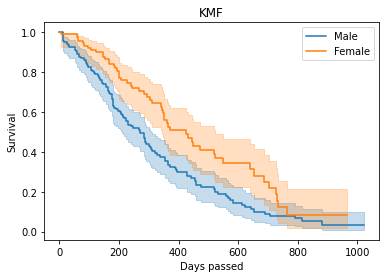

In [48]:
kmf_m.plot()
kmf_f.plot()

plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF")

In [49]:
Time0 = Male['time']
Event0 = Male['dead']

Time1 = Female['time']
Event1 = Female['dead']


result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
result.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [50]:
weighted_tests(Time0,Event0,Time1,Event1)

Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57


Wilcoxon Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic      p  -log2(p)
          12.47 <0.005     11.24


Tarone-Ware Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic      p  -log2(p)
          12.46 <0.005     11.23


Peto Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic      p  -log2(p)
          12.71 <0.005     11.42


Fleming-Harrington test(p:1, q:0)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 1
                 q = 0
         test_name = Flemington-Harrington_test

---
 test_statistic      p  -log2(p)
          12.71 <0.005     11.43


Fleming-Harrington test(p:0.5, q:0.5)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0.5
                 q = 0.5
         test_name = Flemington-Harrington_test

---
 test_statistic      p  -log2(p)
           8.77 <0.005      8.35


Fleming-Harrington test(p:0, q:1)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0
                 q = 1
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           3.46 0.06      3.99

#### Power for Survival Covid Data - Normal, Wilcoxon, Tarone Ware and Peto

In [51]:
powers = np.array([0,0,0,0])
p_values=[[],[],[],[]]
n_simulations=1000

In [53]:
for i in range(n_simulations):
    selected_rows = data.sample(n=100, replace=False)
    Male=selected_rows.query("sex==1")
    Female=selected_rows.query("sex==2")
    
    Time0 = Male['time']
    Event0 = Male['dead']

    Time1 = Female['time']
    Event1 = Female['dead']

    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
    p_values[0].append(result.p_value)
    
    if result.p_value < 0.05:
        powers[0] += 1
        
    for idx, weightings in enumerate(['wilcoxon','tarone-ware','peto']):
        result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings=weightings)
        p_values[idx+1].append(result.p_value)
        
        if result.p_value < 0.05:
            powers[idx+1] += 1
    
powers = powers/n_simulations

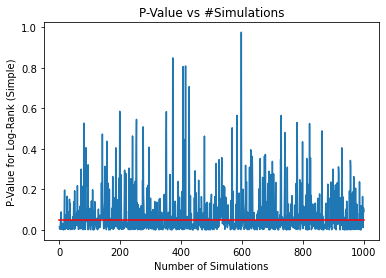

Power of Log-Rank Test : 60.2 %


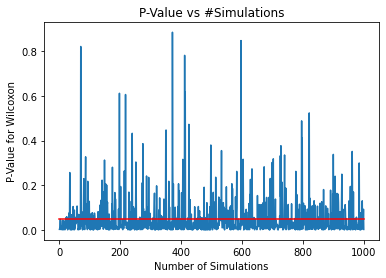

Power of Log-Rank Test : 70.0 %


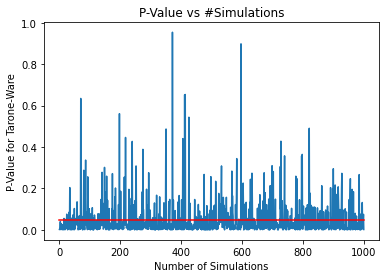

Power of Log-Rank Test : 71.0 %


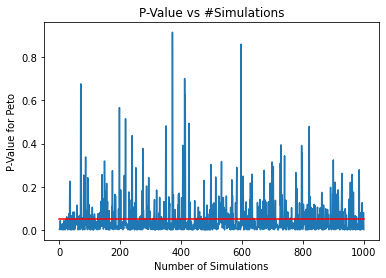

Power of Log-Rank Test : 71.3 %


In [55]:
x=np.linspace(1,n_simulations,n_simulations)
y=[0.05 for _ in range(1000)]
plt.plot(x,p_values[0])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Log-Rank (Simple)')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[0]*100,3)} %")

plt.plot(x,p_values[1])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Wilcoxon')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[1]*100,3)} %")

plt.plot(x,p_values[2])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Tarone-Ware')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[2]*100,3)} %")

plt.plot(x,p_values[3])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Peto')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[3]*100,3)} %")

### Heart Failure

In [57]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [58]:
kmf_n=KaplanMeierFitter()
kmf_s=KaplanMeierFitter()

non_smoker=data.query("smoking==0")
smoker=data.query("smoking==1")

kmf_n.fit(durations=non_smoker["time"],event_observed=non_smoker["DEATH_EVENT"],label="non_smoker")
kmf_s.fit(durations=smoker["time"],event_observed=smoker["DEATH_EVENT"],label="smoker")

<lifelines.KaplanMeierFitter:"smoker", fitted with 96 total observations, 66 right-censored observations>

In [59]:
kmf_n.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,203,203
4.0,1,1,0,0,203
6.0,1,1,0,0,202
7.0,1,1,0,0,201
8.0,1,1,0,0,200
...,...,...,...,...,...
256.0,2,0,2,0,6
257.0,1,0,1,0,4
258.0,1,0,1,0,3


Text(0.5, 1.0, 'KMF')

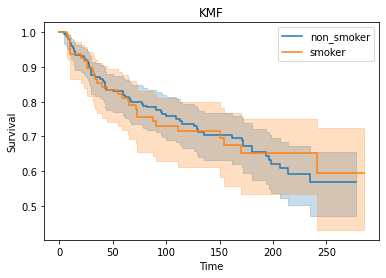

In [60]:
kmf_n.plot()
kmf_s.plot()

plt.xlabel("Time")
plt.ylabel("Survival")
plt.title("KMF")

In [61]:
Time0 = non_smoker['time']
Event0 = non_smoker['DEATH_EVENT']

Time1 = smoker['time']
Event1 = smoker['DEATH_EVENT']

result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
result.print_summary()

print(f'Test Statistic: {result.test_statistic}')

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.96      0.05

Test Statistic: 0.00204170377674378


In [62]:
weighted_tests(Time0, Event0, Time1, Event1)

Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.96      0.05


Wilcoxon Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.06 0.81      0.31


Tarone-Ware Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           0.02 0.90      0.15


Peto Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           0.00 0.96      0.06


Fleming-Harrington test(p:1, q:0)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 1
                 q = 0
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           0.00 0.95      0.07


Fleming-Harrington test(p:0.5, q:0.5)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0.5
                 q = 0.5
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           0.06 0.80      0.32


Fleming-Harrington test(p:0, q:1)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0
                 q = 1
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           0.23 0.63      0.66

#### Power for Heart Failure Data - Normal, Wilcoxon, Tarone Ware and Peto

In [68]:
powers = np.array([0,0,0,0])
p_values=[[],[],[],[]]
n_simulations=1000

In [69]:
for i in range(n_simulations):
    selected_rows = data.sample(n=100, replace=False)
    non_smoker=selected_rows.query("smoking==0")
    smoker=selected_rows.query("smoking==1")
    
    Time0 = non_smoker['time']
    Event0 = non_smoker['DEATH_EVENT']

    Time1 = smoker['time']
    Event1 = smoker['DEATH_EVENT']

    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
    p_values[0].append(result.p_value)
    
    if result.p_value < 0.05:
        powers[0] += 1
        
    for idx, weightings in enumerate(['wilcoxon','tarone-ware','peto']):
        result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings=weightings)
        p_values[idx+1].append(result.p_value)
        
        if result.p_value < 0.05:
            powers[idx+1] += 1
    
powers = powers/n_simulations

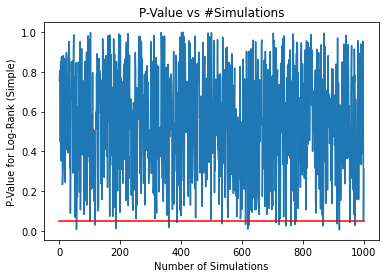

Power of Log-Rank Test : 2.0 %


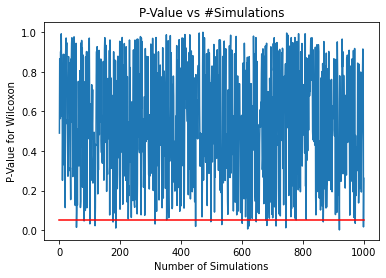

Power of Log-Rank Test : 2.1 %


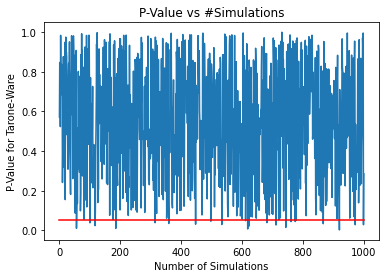

Power of Log-Rank Test : 2.2 %


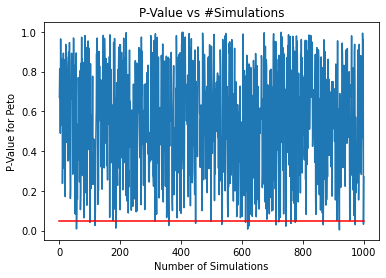

Power of Log-Rank Test : 2.2 %


In [71]:
x=np.linspace(1,n_simulations,n_simulations)
y=[0.05 for _ in range(1000)]
plt.plot(x,p_values[0])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Log-Rank (Simple)')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[0]*100,3)} %")

plt.plot(x,p_values[1])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Wilcoxon')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[1]*100,3)} %")

plt.plot(x,p_values[2])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Tarone-Ware')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[2]*100,3)} %")

plt.plot(x,p_values[3])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Peto')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[3]*100,3)} %")

### Laser Eye Surgery With Diabitities

In [73]:
data = pd.read_csv("diabetic.csv")
data.head()

,rownames,id,laser,age,eye,trt,risk,time,status
0,1,5,argon,28,left,0,9,46.23,0
1,2,5,argon,28,right,1,9,46.23,0
2,3,14,xenon,12,left,1,8,42.50,0
3,4,14,xenon,12,right,0,6,31.30,1
4,5,16,xenon,9,left,1,11,42.27,0


In [74]:
mapping_dict = {'argon': 0, 'xenon': 1}
data['gas'] = data['laser'].map(mapping_dict)

In [75]:
data = data.query("trt==1")
data.head()

,rownames,id,laser,age,eye,trt,risk,time,status,gas
1,2,5,argon,28,right,1,9,46.23,0,0
2,3,14,xenon,12,left,1,8,42.50,0,1
4,5,16,xenon,9,left,1,11,42.27,0,1
7,8,25,xenon,9,right,1,11,20.60,0,1
9,10,29,xenon,13,right,1,9,38.77,0,1


In [76]:
kmf_m=KaplanMeierFitter()
kmf_f=KaplanMeierFitter()

type1=data.query("gas==0")
type2=data.query("gas==1")

kmf_m.fit(durations=type1["time"],event_observed=type1["status"],label="type1")
kmf_f.fit(durations=type2["time"],event_observed=type2["status"],label="type2")

<lifelines.KaplanMeierFitter:"type2", fitted with 114 total observations, 78 right-censored observations>

Text(0.5, 1.0, 'KMF')

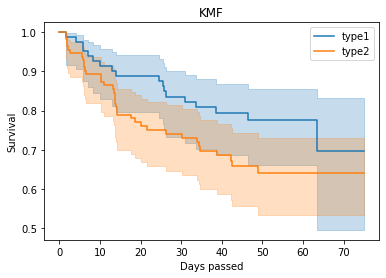

In [77]:
kmf_m.plot()
kmf_f.plot()

plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF")

In [78]:
Time0 = type1['time']
Event0 = type1['status']

Time1 = type2['time']
Event1 = type2['status']


result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
result.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.97 0.09      3.56

In [79]:
weighted_tests(Time0, Event0, Time1, Event1)

Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.97 0.09      3.56


Wilcoxon Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           3.41 0.06      3.94


Tarone-Ware Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           3.33 0.07      3.88


Peto Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           3.10 0.08      3.67


Fleming-Harrington test(p:1, q:0)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 1
                 q = 0
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           3.08 0.08      3.66


Fleming-Harrington test(p:0.5, q:0.5)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0.5
                 q = 0.5
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           2.44 0.12      3.08


Fleming-Harrington test(p:0, q:1)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0
                 q = 1
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           1.58 0.21      2.26

#### Power for Laser Eye Surgery Data - Normal, Wilcoxon, Tarone Ware and Peto

In [80]:
powers = np.array([0,0,0,0])
p_values=[[],[],[],[]]
n_simulations=1000

In [81]:
for i in range(n_simulations):
    selected_rows = data.sample(n=150, replace=False)
    type1=selected_rows.query("gas==0")
    type2=selected_rows.query("gas==1")
    
    Time0 = type1['time']
    Event0 = type1['status']

    Time1 = type2['time']
    Event1 = type2['status']

    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
    p_values[0].append(result.p_value)
    
    if result.p_value < 0.05:
        powers[0] += 1
        
    for idx, weightings in enumerate(['wilcoxon','tarone-ware','peto']):
        result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings=weightings)
        p_values[idx+1].append(result.p_value)
        
        if result.p_value < 0.05:
            powers[idx+1] += 1
    
powers = powers/n_simulations

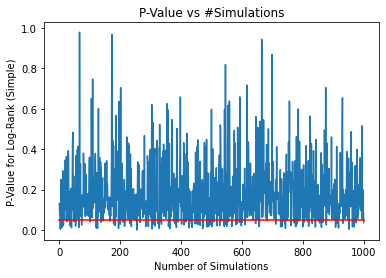

Power of Log-Rank Test : 14.7 %


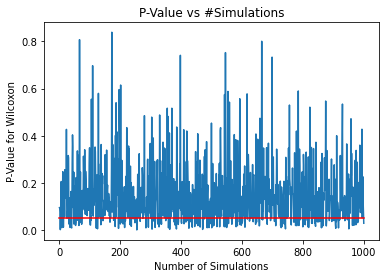

Power of Log-Rank Test : 20.3 %


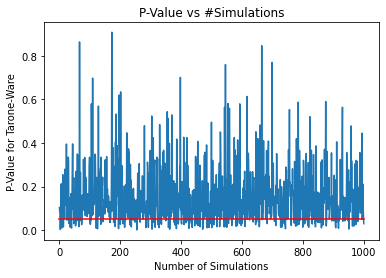

Power of Log-Rank Test : 19.4 %


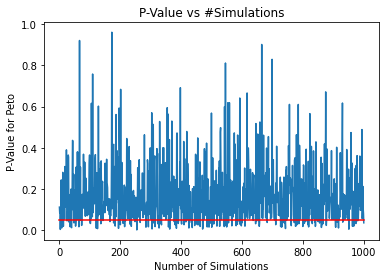

Power of Log-Rank Test : 16.0 %


In [82]:
x=np.linspace(1,n_simulations,n_simulations)
y=[0.05 for _ in range(1000)]
plt.plot(x,p_values[0])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Log-Rank (Simple)')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[0]*100,3)} %")

plt.plot(x,p_values[1])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Wilcoxon')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[1]*100,3)} %")

plt.plot(x,p_values[2])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Tarone-Ware')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[2]*100,3)} %")

plt.plot(x,p_values[3])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Peto')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[3]*100,3)} %")

### Survival After Heart Attack


In [83]:
data = pd.read_csv("echocardiogram.csv")
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [84]:
print(data.isnull().sum())
print(data.shape)

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64
(133, 13)


In [85]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
COLUMNS = ['age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score']
X = imp_mean.fit_transform(data[COLUMNS])
data_X = pd.DataFrame(X,columns = COLUMNS)
data_X.shape

(133, 6)

In [86]:
COLUMNS_keep = ['survival', 'alive']
data_keep = data[COLUMNS_keep]
data_keep.shape

(133, 2)

In [87]:
data = pd.concat([data_keep, data_X], axis = 1)
data = data.dropna() 
print(data.isnull().sum())
print(data.shape)

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
dtype: int64
(130, 8)


In [88]:
data.loc[data.alive == 1, 'dead'] = 0
data.loc[data.alive == 0, 'dead'] = 1

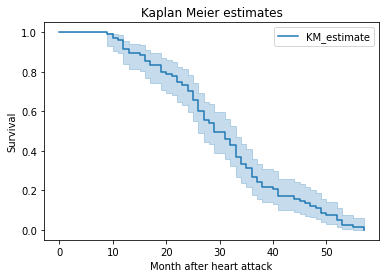

In [89]:
kmf = KaplanMeierFitter()
T = data['survival']
E = data['dead']
kmf.fit(T, event_observed = E)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("Month after heart attack")
plt.ylabel("Survival")
plt.show()

Text(0, 0.5, 'Survival')

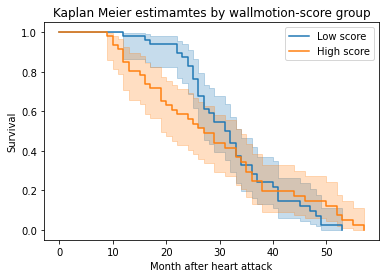

In [90]:
df1 = data[data['wallmotion-score'] < statistics.median(data['wallmotion-score'])]
df2 = data[data['wallmotion-score'] >= statistics.median(data['wallmotion-score'])]
kmf.fit(df1['survival'], event_observed = df1['dead'], label = 'Low score')
kmf.plot()
kmf.fit(df2['survival'], event_observed = df2['dead'], label = 'High score')
kmf.plot()
plt.title("Kaplan Meier estimamtes by wallmotion-score group")
plt.xlabel("Month after heart attack")
plt.ylabel("Survival")

In [91]:
Time0 = df1['survival']
Event0 = df1['dead']

Time1 = df2['survival']
Event1 = df2['dead']


result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
result.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.05 0.82      0.29

In [92]:
weighted_tests(Time0, Event0, Time1, Event1)

Log-Rank Test (Simple)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.05 0.82      0.29


Wilcoxon Test


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           3.60 0.06      4.12


Tarone-Ware Test


<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           1.47 0.22      2.15


Peto Test


<lifelines.StatisticalResult: Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = Peto_test

---
 test_statistic    p  -log2(p)
           3.30 0.07      3.85


Fleming-Harrington test(p:1, q:0)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 1
                 q = 0
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           3.01 0.08      3.60


Fleming-Harrington test(p:0.5, q:0.5)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0.5
                 q = 0.5
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           0.25 0.62      0.70


Fleming-Harrington test(p:0, q:1)


<lifelines.StatisticalResult: Flemington-Harrington_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
                 p = 0
                 q = 1
         test_name = Flemington-Harrington_test

---
 test_statistic    p  -log2(p)
           2.72 0.10      3.33

#### Power for Survival after Heart Attack Data - Normal, Wilcoxon, Tarone Ware and Peto

In [98]:
powers = np.array([0,0,0,0])
p_values=[[],[],[],[]]
n_simulations=1000

In [99]:
for i in range(n_simulations):
    selected_rows_df1 = df1.sample(n=20, replace=False)
    selected_rows_df2 = df2.sample(n=20, replace=False)
    
    Time0 = selected_rows_df1['survival']
    Event0 = selected_rows_df1['dead']

    Time1 = selected_rows_df2['survival']
    Event1 = selected_rows_df2['dead']

    result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1)
    p_values[0].append(result.p_value)
    
    if result.p_value < 0.05:
        powers[0] += 1
        
    for idx, weightings in enumerate(['wilcoxon','tarone-ware','peto']):
        result=logrank_test(Time0,Time1,event_observed_A=Event0,event_observed_B=Event1,weightings=weightings)
        p_values[idx+1].append(result.p_value)
        
        if result.p_value < 0.05:
            powers[idx+1] += 1
    
powers = powers/n_simulations

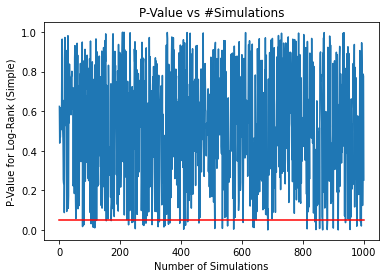

Power of Log-Rank Test : 5.2 %


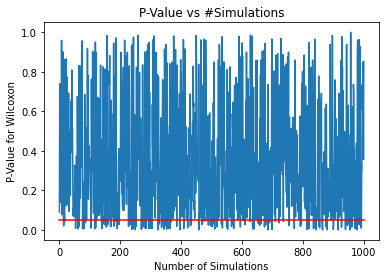

Power of Log-Rank Test : 14.9 %


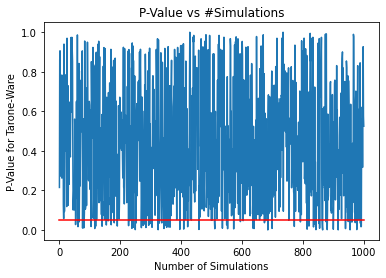

Power of Log-Rank Test : 9.0 %


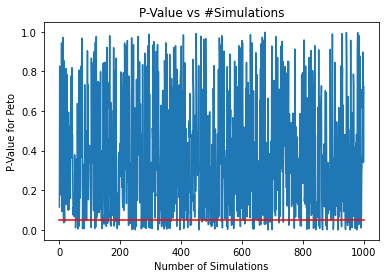

Power of Log-Rank Test : 13.9 %


In [100]:
x=np.linspace(1,n_simulations,n_simulations)
y=[0.05 for _ in range(1000)]
plt.plot(x,p_values[0])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Log-Rank (Simple)')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[0]*100,3)} %")

plt.plot(x,p_values[1])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Wilcoxon')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[1]*100,3)} %")

plt.plot(x,p_values[2])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Tarone-Ware')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[2]*100,3)} %")

plt.plot(x,p_values[3])
plt.plot(x,y,color='r')
plt.xlabel('Number of Simulations')
plt.ylabel('P-Value for Peto')
plt.title('P-Value vs #Simulations')
plt.show()
print(f"Power of Log-Rank Test : {round(powers[3]*100,3)} %")